# Exploring OpenCV 

Code snippets from the assignment are refactored and used in this notebook, there're some additional explanations and comments added to the code snippets in addition to new snippets from openCV and matplotlib documentations.

In [1]:
import numpy as np
from skimage import io
import skimage.feature as sf
import matplotlib.pyplot as plt
from sympy import *
import cv2 as cv
import scipy.ndimage

1. Capturing and recording an image using your webcam.

In [2]:
# Create a camera capture object and capture an image
cam = cv.VideoCapture(0)  # 0 is the default camera

while True:
    ret_val, img = cam.read()
    if img is None:
        
        break

    # Display the captured frame
    cv.imshow('My Webcam', img)

    # Press 'Esc' to save the image and exit
    if cv.waitKey(1) == 27:
        cv.imwrite('captured_image.png', img)  # Save the image as PNG
        print("Image saved successfully.")
        break

# Release the camera and close windows
cv.destroyAllWindows()
del cam


Image saved successfully.


2. Opening and displaying an image.

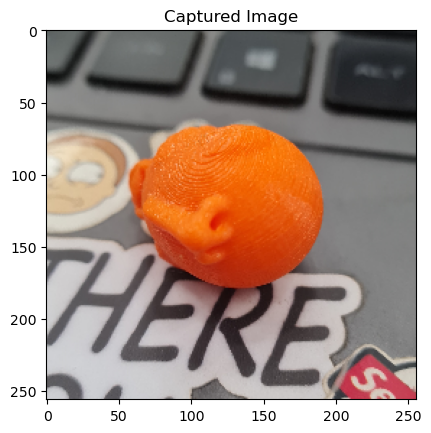

In [3]:
# Read the saved image using skimage
face = io.imread('./captured_image.png')

# Resize the image to 256x256 pixels
face = cv.resize(face, (256, 256))

# Display the image using matplotlib
fig, ax = plt.subplots()
plt.imshow(face)
plt.title("Captured Image")
plt.show()


3. Look at an interesting point on your image.

3.a. 

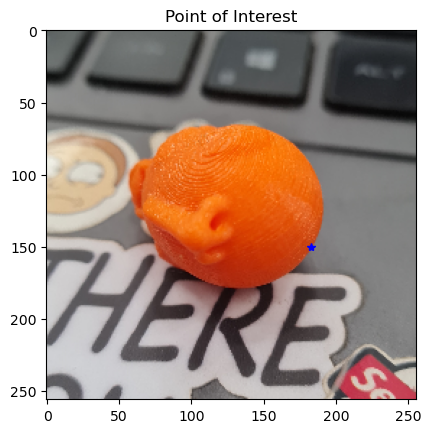

In [4]:
# Specifying an interesting point by hand
i, j = 150, 183

# Plot the point on the image
fig, ax = plt.subplots()
ax.imshow(face)
points, = ax.plot(j, i, 'b*')  # x corresponds to columns, y corresponds to rows
plt.title("Point of Interest")
plt.show()


3.b. Create a chunk of the image


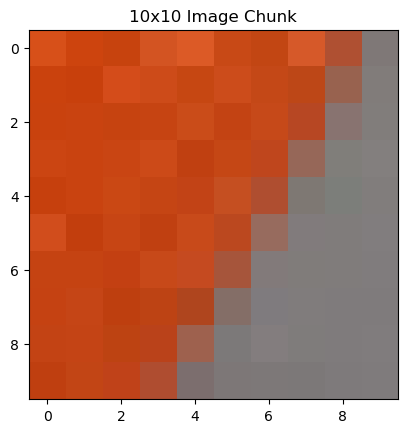

10x10 Image Chunk Array:
 [[[215  80  25 255]
  [205  68  14 255]
  [199  67  14 255]
  [211  84  34 255]
  [220  90  38 255]
  [200  73  22 255]
  [194  70  19 255]
  [214  89  41 255]
  [175  80  50 255]
  [127 120 119 255]]

 [[202  66  13 255]
  [200  64  12 255]
  [212  76  26 255]
  [205  75  25 255]
  [198  71  18 255]
  [204  76  27 255]
  [196  72  23 255]
  [189  71  23 255]
  [152  98  79 255]
  [129 124 122 255]]

 [[201  66  14 255]
  [201  67  16 255]
  [198  67  16 255]
  [198  68  18 255]
  [202  76  25 255]
  [195  67  19 255]
  [198  73  25 255]
  [183  71  35 255]
  [136 115 112 255]
  [129 125 123 255]]

 [[203  69  18 255]
  [201  67  16 255]
  [201  69  19 255]
  [204  74  24 255]
  [192  64  17 255]
  [197  71  21 255]
  [191  70  29 255]
  [150 103  88 255]
  [128 126 122 255]
  [131 127 126 255]]

 [[198  64  13 255]
  [201  67  16 255]
  [202  72  20 255]
  [197  69  20 255]
  [194  67  22 255]
  [197  79  33 255]
  [175  78  48 255]
  [126 120 115 255]
  [124

In [5]:
# Selecting a 10x10 chunk around the point (i, j)
chunk = face[i-5:i+5, j-5:j+5, :]  # Extract a 10x10 region

# Display the chunk
plt.imshow(chunk)
plt.title("10x10 Image Chunk")
plt.show()

# Print the chunk array values
print("10x10 Image Chunk Array:\n", chunk)


In [6]:
# Check for image color channels
if chunk.shape[2] == 3:
    print("The image is in RGB format.")
elif chunk.shape[2] == 4:
    print("The image is in RGBA format. \nExtracting the alpha channel values.")
    print(chunk[:, :, 3]) # Alpha channel values

The image is in RGBA format. 
Extracting the alpha channel values.
[[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]


3.c Displaying a single-color channel

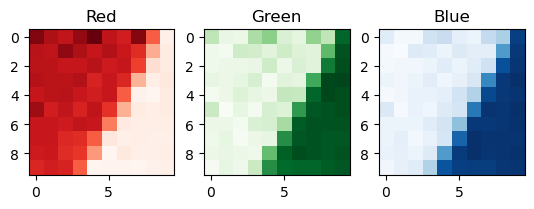

In [7]:
'''
chunk[:, :, 0] = \
      [[215, 205, 199, 211, 220, 200, 194, 214, 175, 127],
       [202, 200, 212, 205, 198, 204, 196, 189, 152, 129],
       [201, 201, 198, 198, 202, 195, 198, 183, 136, 129],
       [203, 201, 201, 204, 192, 197, 191, 150, 128, 131],
       [198, 201, 202, 197, 194, 197, 175, 126, 124, 129],
       [209, 194, 199, 192, 200, 187, 151, 129, 128, 129],
       [197, 197, 195, 199, 197, 166, 130, 128, 128, 128],
       [197, 197, 190, 189, 175, 132, 127, 128, 127, 127],
       [195, 196, 189, 186, 158, 124, 131, 127, 127, 128],
       [191, 194, 192, 175, 124, 125, 125, 124, 126, 127]]

chunk[:, :, 1] = \
      [[ 80,  68,  67,  84,  90,  73,  70,  89,  80, 120],
       [ 66,  64,  76,  75,  71,  76,  72,  71,  98, 124],
       [ 66,  67,  67,  68,  76,  67,  73,  71, 115, 125],
       [ 69,  67,  69,  74,  64,  71,  70, 103, 126, 127],
       [ 64,  67,  72,  69,  67,  79,  78, 120, 126, 125],
       [ 77,  62,  69,  64,  74,  72, 107, 123, 124, 125],
       [ 67,  67,  64,  73,  74,  85, 122, 124, 124, 124],
       [ 66,  69,  63,  67,  69, 110, 123, 124, 123, 123],
       [ 67,  68,  67,  66,  97, 121, 125, 124, 123, 124],
       [ 63,  69,  66,  77, 110, 119, 120, 120, 122, 123]]

chunk[:, :, 2] = \
      [[ 25,  14,  14,  34,  38,  22,  19,  41,  50, 119],
       [ 13,  12,  26,  25,  18,  27,  23,  23,  79, 122],
       [ 14,  16,  16,  18,  25,  19,  25,  35, 112, 123],
       [ 18,  16,  19,  24,  17,  21,  29,  88, 122, 126],
       [ 13,  16,  20,  20,  22,  33,  48, 115, 122, 124],
       [ 28,  13,  20,  17,  26,  31,  94, 124, 123, 126],
       [ 18,  18,  18,  25,  32,  59, 122, 122, 123, 125],
       [ 18,  22,  15,  20,  30, 103, 126, 124, 124, 124],
       [ 20,  21,  18,  26,  78, 121, 126, 123, 124, 125],
       [ 16,  21,  25,  48, 110, 119, 120, 120, 123, 124]]
'''

# Display the color channels separately

ax = plt.subplot(1, 3, 1)
plt.imshow(chunk[:, :, 0], cmap='Reds');
plt.title("Red")

ax = plt.subplot(1, 3, 2)
plt.imshow(chunk[:, :, 1], cmap='Greens');
plt.title("Green")

ax = plt.subplot(1, 3, 3)
plt.imshow(chunk[:, :, 2], cmap='Blues');
plt.title("Blue")

plt.show()

4. Creating a gray-scale image

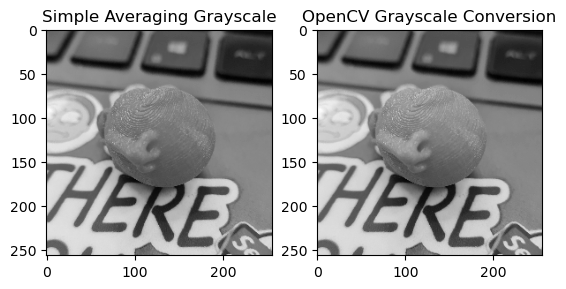

In [8]:
# Convert to grayscale using the simple averaging method
grayscale_image = np.mean(face[:, :, :3], axis=2) # Using np.mean instead of manually averaging

# Convert using OpenCV's cvtColor function
gray_opencv = cv.cvtColor(face, cv.COLOR_RGB2GRAY)

# Display both grayscale images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(grayscale_image, cmap='gray')
ax1.set_title("Simple Averaging Grayscale")
ax2.imshow(gray_opencv, cmap='gray')
ax2.set_title("OpenCV Grayscale Conversion")
plt.show()


5. Blurring an image

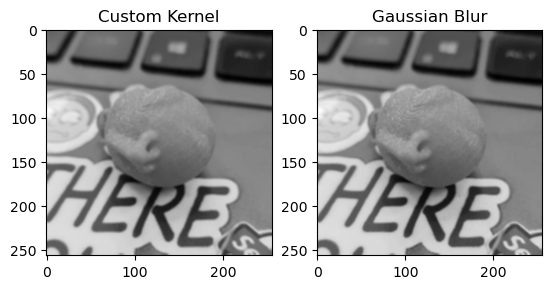

In [9]:
# Define a simple 3x3 blur kernel
# Values sum to 1 because it's weighted averaging
kernel = np.ones((3, 3)) / 9.0  
filtered_image = cv.filter2D(gray_opencv, -1, kernel)

ax = plt.subplot(1, 2, 1)
# Display the blurred image
ax.imshow(filtered_image, cmap='gray')
ax.set_title("Custom Kernel")

# Apply Gaussian blur using OpenCV
blurred_image = cv.GaussianBlur(gray_opencv, (3, 3), 0)

ax = plt.subplot(1, 2, 2)
# Display the blurred image
ax.imshow(blurred_image, cmap='gray')
ax.set_title("Gaussian Blur");

plt.show()


6. Finding edges with a derivative filter


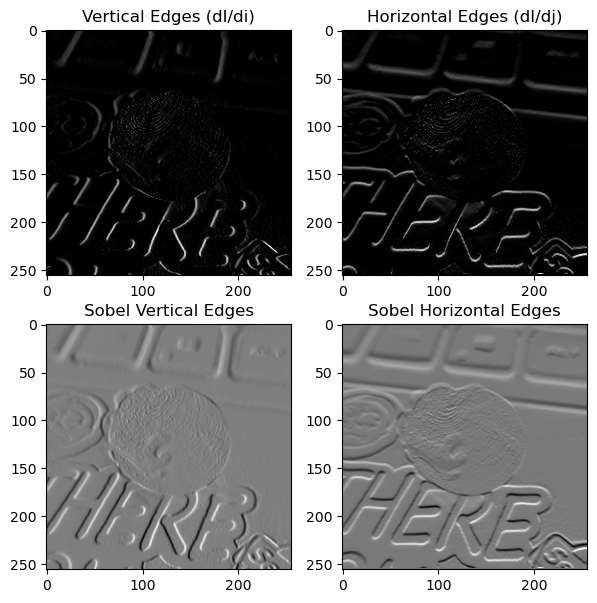

In [10]:
# Define the derivative filters
kernel_i = np.array([[-1, 0, 1]])  # Horizontal derivative filter
kernel_j = np.array([[-1], [0], [1]])  # Vertical derivative filter (transpose)

# Apply the filters using cv.filter2D()
dI_di = cv.filter2D(gray_opencv, -1, kernel_i)  # Derivative in the vertical direction
dI_dj = cv.filter2D(gray_opencv, -1, kernel_j)  # Derivative in the horizontal direction

# Use the Sobel filter for comparison
sobel_di = cv.Sobel(gray_opencv, cv.CV_64F, 1, 0, ksize=3)  # Sobel in vertical direction
sobel_dj = cv.Sobel(gray_opencv, cv.CV_64F, 0, 1, ksize=3)  # Sobel in horizontal direction

# Display the results
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax[0, 0].imshow(dI_di, cmap='gray')
ax[0, 0].set_title("Vertical Edges (dI/di)")
ax[0, 1].imshow(dI_dj, cmap='gray')
ax[0, 1].set_title("Horizontal Edges (dI/dj)")

# Display Sobel results
ax[1, 0].imshow(sobel_di, cmap='gray')
ax[1, 0].set_title("Sobel Vertical Edges")
ax[1, 1].imshow(sobel_dj, cmap='gray')
ax[1, 1].set_title("Sobel Horizontal Edges")

plt.show()


7. Create and interpret edge magnitude and phase images

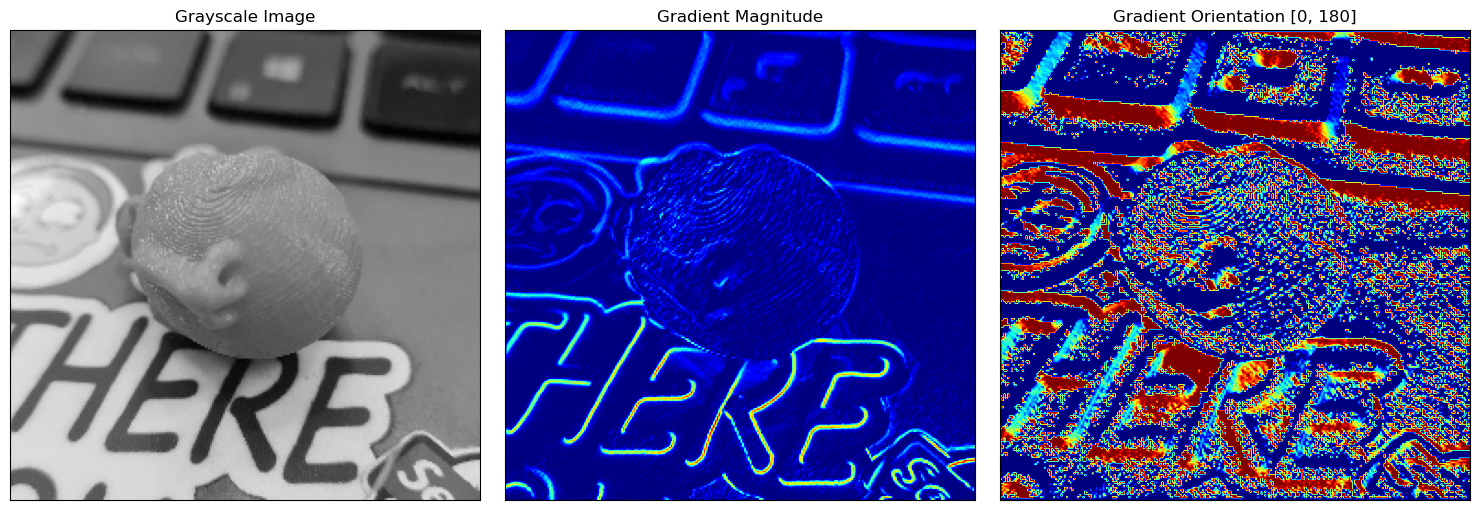

In [11]:
# Cast dI_di and dI_dj to float type
Ii = dI_di.astype(float)
Ij = dI_dj.astype(float)

# Compute the magnitude and orientation
magnitude = np.sqrt((Ii ** 2) + (Ij ** 2))  # Gradient magnitude
orientation = np.arctan2(Ij, Ii) * (180 / np.pi) % 180  # Gradient orientation in degrees

# Display the images using matplotlib
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the grayscale image
axs[0].imshow(gray_opencv, cmap="gray")
axs[0].set_title("Grayscale Image")

# Plot the gradient magnitude
axs[1].imshow(magnitude, cmap="jet")
axs[1].set_title("Gradient Magnitude")

# Plot the gradient orientation
axs[2].imshow(orientation, cmap="jet")
axs[2].set_title("Gradient Orientation [0, 180]")

# Remove the x and y ticks for all images
for ax in axs:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

# Show the plots
plt.tight_layout()
plt.show()

8. Image Histogram

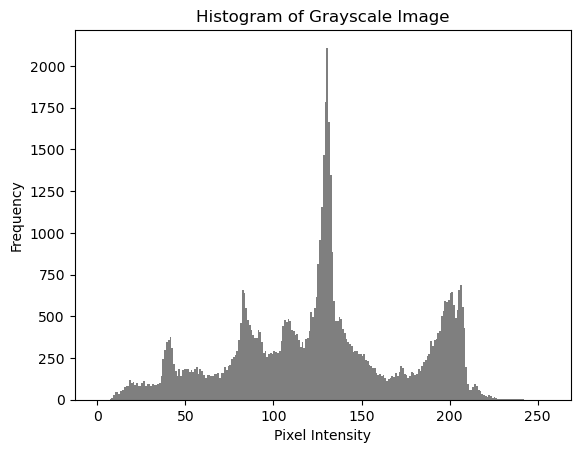

In [12]:
# https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html
plt.hist(gray_opencv.ravel(), bins=256, range=[0, 256], color='k', alpha=0.5); # Using hist here is far more convenient
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

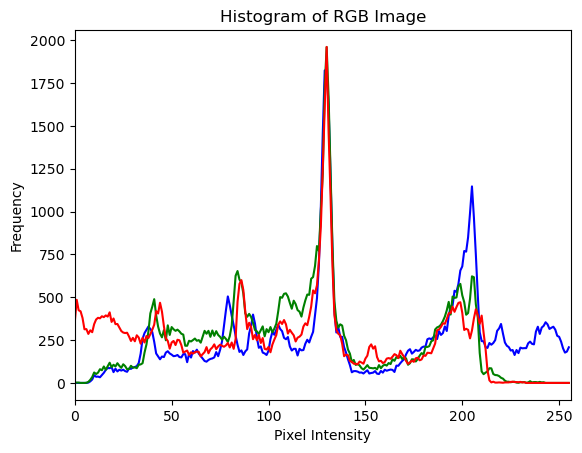

In [13]:
# Color Histogram
color = ('b','g','r')

for i, col in enumerate(color):
    plt.plot(cv.calcHist([face], [i], None, [256], [0, 256]), color=col)
    plt.xlim([0, 256])

plt.title("Histogram of RGB Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


9. Masking an image


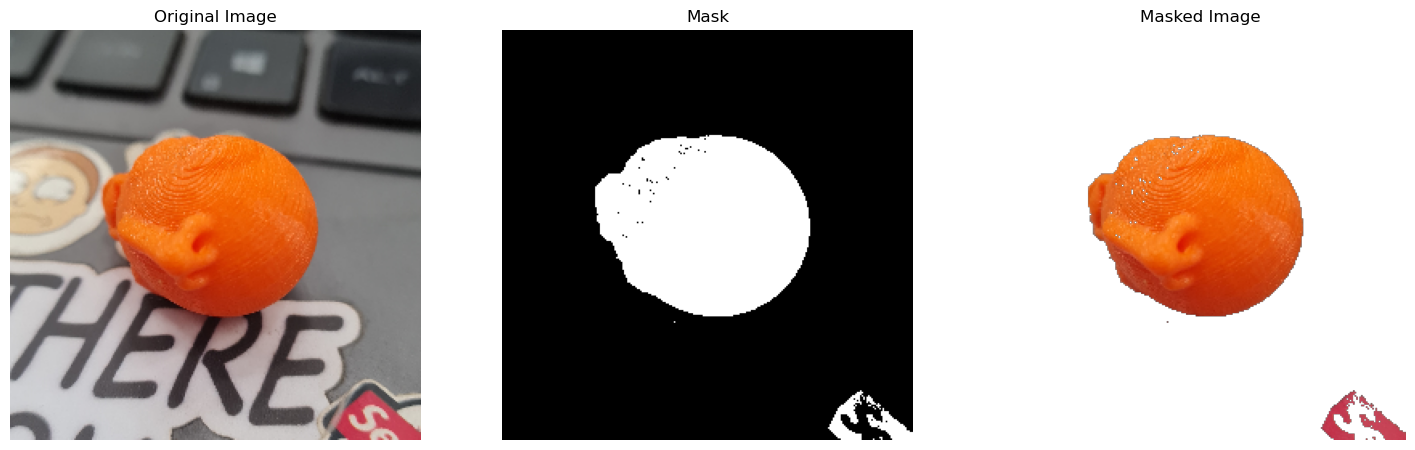

In [14]:
# Create a binary mask of the same size as the image (2D)
mask = ((face[:, :, 0] >= 140) & (face[:, :, 1] <= 180) & (face[:, :, 2] <= 90))
mask = mask.astype(np.uint8) * 255  # Convert mask to 8-bit unsigned integer

# Apply the mask to the image using bitwise_and
masked_img = cv.bitwise_and(face, face, mask=mask)

# Display the original image, mask, and masked image
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Original Image
ax[0].imshow(face)
ax[0].set_title("Original Image")
ax[0].axis("off")

# Mask
ax[1].imshow(mask, cmap='gray')
ax[1].set_title("Mask")
ax[1].axis("off")

# Masked Image
ax[2].imshow(masked_img)
ax[2].set_title("Masked Image")
ax[2].axis("off")

plt.show()


10. Image Geometry


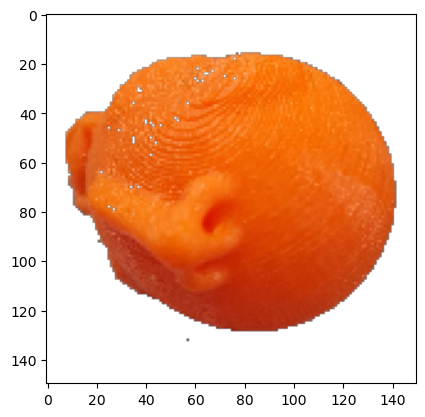

In [15]:
# Cropping the masked image to have the object only
croped_obj = masked_img[50:200, 50:200]
plt.imshow(croped_obj);

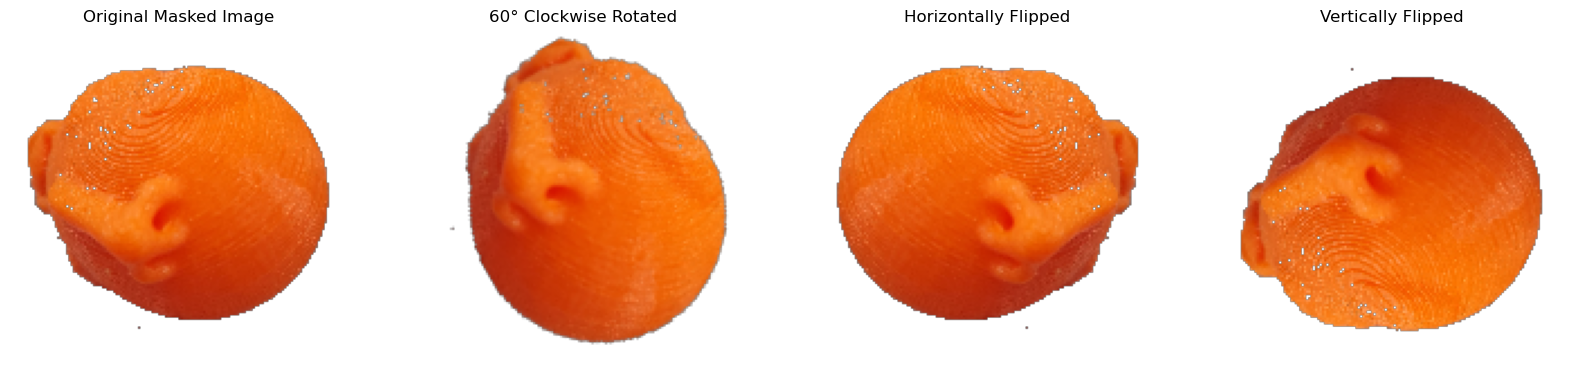

In [16]:
# Rotate the image by 60 degrees clockwise
# Get the image dimensions
(h, w) = croped_obj.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Create the rotation matrix using cv.getRotationMatrix2D (rotation in degrees, scale=1)
rotation_matrix = cv.getRotationMatrix2D(center, -60, 1)  # Negative value for clockwise rotation

# Apply the rotation matrix using cv.warpAffine
rotated_img = cv.warpAffine(croped_obj, rotation_matrix, (w, h))

# Flip the image horizontally
horizontally_flipped = cv.flip(croped_obj, 1)  # Flip code 1 for horizontal flip

# Flip the image vertically
vertically_flipped = cv.flip(croped_obj, 0)  # Flip code 0 for vertical flip

# Display all the images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Original Masked Image
ax[0].imshow(croped_obj)
ax[0].set_title("Original Masked Image")
ax[0].axis("off")

# Rotated Image
ax[1].imshow(rotated_img)
ax[1].set_title("60° Clockwise Rotated")
ax[1].axis("off")

# Horizontally Flipped Image
ax[2].imshow(horizontally_flipped)
ax[2].set_title("Horizontally Flipped")
ax[2].axis("off")

# Vertically Flipped Image
ax[3].imshow(vertically_flipped)
ax[3].set_title("Vertically Flipped")
ax[3].axis("off")

plt.show()